In [2]:
from lib import *

In [314]:
sample = """
t1=LOAD(x);
t2=t1 +4;
t3=t1 *8;
t4=t1 -4;
t5=t1 /2;
t6=t2 * t3;
t7=t4-t5;
t8=t6 * t7;
t9=t5 * t2;
t10= ^ t9;
STORE(y , t8 );
STORE(z , t10 );"""


In [ ]:
sample = """
t1=LOAD(x);
t2=t1 +4;
t3= t1 * 8;
t4=t3 /t2;
STORE(y , t4 );"""

In [333]:
sample = """
t1=LOAD(x);
t1=LOAD(x);
t2=t1 + t1;
t1=t1 - 4;
t2=t1 /t2;
t1=t2 * t1;
STORE(y , t1 );
STORE(z , t2 );
STORE(z , t2 );
"""

In [327]:
sample = """
t1=LOAD(x);
t1=9;
t1=^t1;
t1= ^t1;
STORE(y , t1 );"""


In [7]:
sample = """
t3=LOAD(x);
t1=49;
t2=40+40;
t1=^t1;
t2=t2/2;
t1=t1*t2;
t1=t1/t3;
STORE(y , t1 );"""

[('LOAD', 't3', 'x', ()), ('EQ', 't1', '49', ()), ('ADD', 't2', '40', '40', ()), ('SQRT', 't1', 't1', (1,)), ('DIV', 't2', 't2', '2', (2,)), ('MUL', 't1', 't1', 't2', (3, 4)), ('DIV', 't1', 't1', 't3', (0, 3, 5)), ('STORE', 'y', 't1', (6,))]
[('LOAD', 't3', 'x', ()), ('SQRT', 't1', '49', ()), ('DIV', 't2', '80', '2', ()), ('MUL', 't1', 't1', 't2', (1, 2)), ('DIV', 't1', 't1', 't3', (0, 3)), ('STORE', 'y', 't1', (4,))]

[('LOAD', 't3', 'x', ()), ('SQRT', 't1', '49', ()), ('DIV', 't2', '80', '2', ()), ('MUL', 't1', 't1', 't2', (1, 2)), ('DIV', 't1', 't1', 't3', (0, 3)), ('STORE', 'y', 't1', (4,))]
[('LOAD', 't3', 'x', ()), ('MUL', 't1', '7.0', '40.0', ()), ('DIV', 't1', 't1', 't3', (0, 1)), ('STORE', 'y', 't1', (2,))]

[('LOAD', 't3', 'x', ()), ('MUL', 't1', '7.0', '40.0', ()), ('DIV', 't1', 't1', 't3', (0, 1)), ('STORE', 'y', 't1', (2,))]
[('LOAD', 't3', 'x', ()), ('DIV', 't1', '280.0', 't3', (0,)), ('STORE', 'y', 't1', (1,))]

[('LOAD', 't3', 'x', ()), ('DIV', 't1', '280.0', 't3', (0,)

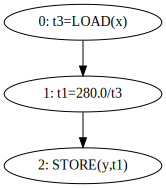

In [8]:

parse_instance = Parser()
IR,depend,indep,line_depend= parse_instance.parse(sample)
print('Final IR')
pprint(IR)
print("ind",indep)
print("dep",depend)
print("line:",line_depend)

parse_instance.dot
        

In [9]:
multi_core_count = 3   

multi_code_gen_instance = CodeGen(multi_core_count,path="multi-core_code/")
multi_code_gen_instance.generate_backend_code(IR)

single_code_gen_instance = CodeGen(1,path="single-core_code/")
single_code_gen_instance.generate_backend_code(IR)

Iteration: 0	 New Imbalance: 9, Current Imbalance: 7
Stopping with an Current Imbalance of 7
Iteration: 0	 New Imbalance: 0, Current Imbalance: 0
Stopping with an Current Imbalance of 0


In [12]:
multi_instance = Simulator(multi_core_count,'multi-core_code/')
multi_instance.MEM['x']= 10
print(multi_instance.MEM)
multi_instance.run()
print(multi_instance.MEM)
    

{'x': 10}
[[['LOAD', 't3', 'x'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP']], [['NOP'], ['DIV', 't1', '280.0', 't3'], ['NOP']], [['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['STORE', 'y', 't1']]]
Cycle:1,	PE_0: LOAD, t3, x[1], 	PE_1: NOP[1], 	PE_2: NOP[1], 
Cycle:2,	PE_0: NOP[1], 	PE_1: DIV, t1, 280.0, t3[8], 	PE_2: NOP[1], 
Cycle:3,	PE_0: NOP[1], 	PE_1: DIV, t1, 280.0, t3[7], 	PE_2: NOP[1], 
Cycle:4,	PE_0: NOP[1], 	PE_1: DIV, t1, 280.0, t3[6], 	PE_2: NOP[1], 
Cycle:5,	PE_0: NOP[1], 	PE_1: DIV, t1, 280.0, t3[5], 	PE_2: NOP[1], 
Cycle:6,	PE_0: NOP[1], 	PE_1: DIV, t1, 280.0, t3[4], 	PE_2: NOP[1], 
Cycle:7,	PE_0: NOP[1], 	PE_1: DIV, t1, 280.0, t3[3], 	PE_2: NOP[1], 
Cycle:8,	PE_0: NOP[1], 	PE_1: DIV, t1, 280.0, t3[2], 	PE_2: NOP[1], 
Cycle:9,	PE_0: NOP[1], 	PE_1: DIV, t1, 280.0, t3[1], 	PE_2: NOP[1], 
Cycle:10,	PE_0: NOP[1], 	PE_1: NOP[1], 	PE_2: STORE, y, t1[1], 
{'x': 10, 'y': 28.0}


In [13]:
seq_instance = Simulator(1,'single-core_code/')
seq_instance.MEM['x']= 10
print(seq_instance.MEM)
seq_instance.run()
print(seq_instance.MEM)

{'x': 10}
[[['LOAD', 't3', 'x'], ['DIV', 't1', '280.0', 't3'], ['STORE', 'y', 't1']]]
Cycle:1,	PE_0: LOAD, t3, x[1], 
Cycle:2,	PE_0: DIV, t1, 280.0, t3[8], 
Cycle:3,	PE_0: DIV, t1, 280.0, t3[7], 
Cycle:4,	PE_0: DIV, t1, 280.0, t3[6], 
Cycle:5,	PE_0: DIV, t1, 280.0, t3[5], 
Cycle:6,	PE_0: DIV, t1, 280.0, t3[4], 
Cycle:7,	PE_0: DIV, t1, 280.0, t3[3], 
Cycle:8,	PE_0: DIV, t1, 280.0, t3[2], 
Cycle:9,	PE_0: DIV, t1, 280.0, t3[1], 
Cycle:10,	PE_0: STORE, y, t1[1], 
{'x': 10, 'y': 28.0}


In [14]:
seq_instance.MEM == multi_instance.MEM

True